### Visualize how factor is applied

In [52]:
import pandas as pd
import numpy as np
import os
from io import StringIO
from functools import reduce

import matplotlib.pyplot as plt

INPUT_DIR = "/home/tomasmizera/school/diploma/src/data/reviews/only-long"

files_order = list(filter(lambda x: x, (map(lambda x: x.name if x.is_file() else '', os.scandir(INPUT_DIR)))))
files_order

In [79]:
LOGS_DIR = "/home/tomasmizera/school/diploma/src/data/logs/experiment/v3-fix/"

In [89]:
def load_files(path_to_files):
    
    def _read_text_file(filepath):
        with open(filepath, 'r') as f:
            lines = f.readlines()
            lines[0] = lines[0][2:] # remove leading hashtag
            lines[0] = lines[0].replace(',', ' ')
            return reduce(lambda a, b: a + b, lines)
    
    files_it = os.scandir(path_to_files)
    files_contents = {}
    
    for file in files_it:
        if file.is_file() and file.name.startswith('fp-'):
            factor = file.name.replace('fp-', '')
            factor = factor.replace('.csv', '')
            files_contents[factor] = _read_text_file(file.path)
        
    return dict(sorted(files_contents.items()))

In [90]:
file_contents = load_files(LOGS_DIR)

In [91]:
# 1. build dataframe from each

dfs = {}

for item in file_contents.items():
    factor = item[0]
    content = StringIO(item[1])
    df = pd.read_csv(content, delimiter=' ')
    dfs[factor] = df

# 2. filter silly examples

silly_files_mask = [
    files_order.index("review-low.txt-test-setup"),
    files_order.index("review-med.txt-test-setup"),
    files_order.index("review-top.txt-test-setup"),
    files_order.index("review-low.txt-test"),
    files_order.index("review-med.txt-test"),
    files_order.index("review-top.txt-test") 
]
silly_files_mask

In [92]:
def process(df):
#     df = df.drop(silly_files_mask, errors='ignore')
    df = df.reset_index(drop=True)
    
    df['difSimple'] = df.originalP - df.simpleSP
    df['difCustom'] = df.originalP - df.customSP
    return df.difCustom.mean(), df.difSimple.mean()

def process_arr(dfs):
    data = {}
    for d in dfs.items():
        ix = d[0]
        data[int(ix)] = process(d[1])
    return data


In [95]:
processed = process_arr(dfs)

In [96]:
pdf = pd.DataFrame(processed).T
pdf = pdf.rename({0:'custom', 1:'textrank'}, axis=1)
pdf = pdf.sort_index()
pdf

,custom,textrank
0,-0.013548,-0.013548
1,-0.000797,-0.006964
2,-0.021221,-0.040489
3,0.002389,-0.011548
4,0.038073,-0.007695
5,-0.039587,-0.039478
6,0.019617,0.003537
7,0.014948,0.026279
8,-0.031243,-0.031132
9,-0.035446,-0.019416


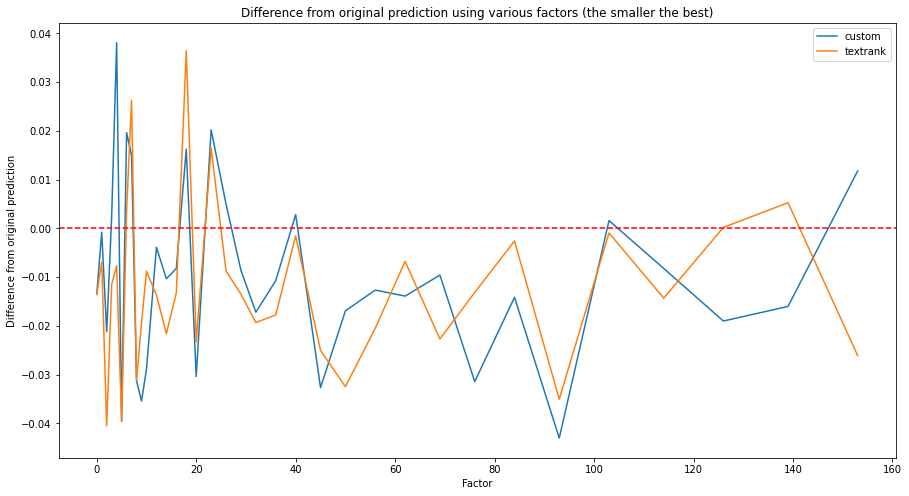

In [97]:
ax = pdf.plot(
    figsize=(15,8), 
    xlabel="Factor", 
    ylabel="Difference from original prediction", 
    fontsize=10, 
    title="Difference from original prediction using various factors (the smaller the best)"
);

ax.axhline(y=0, color='r', linestyle='--', label='vline1.5custom');

plt.show()

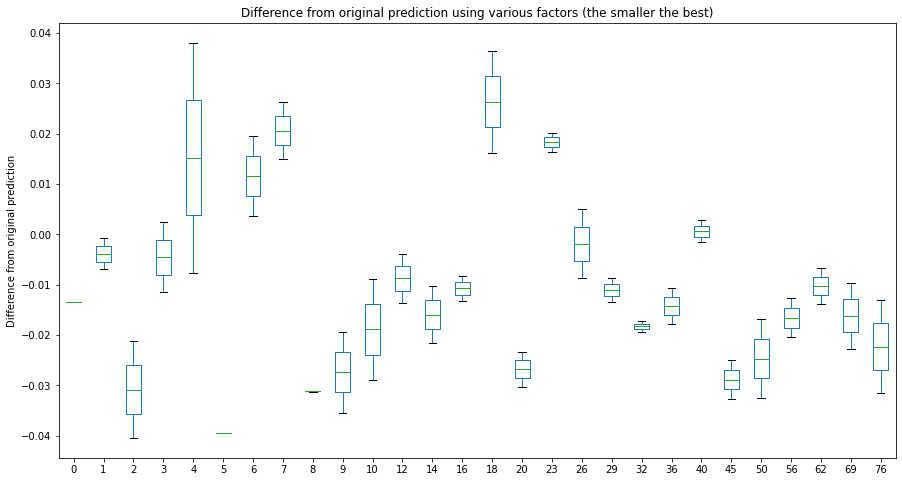

In [88]:
pdf.T.plot.box(
    figsize=(15,8), 
    xlabel="Factor", 
    ylabel="Difference from original prediction", 
    fontsize=10, 
    title="Difference from original prediction using various factors (the smaller the best)"
);

<AxesSubplot:>

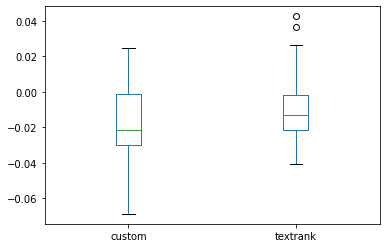

In [21]:
pdf.plot.box()

In [22]:
pdf.describe()

,custom,textrank
count,38.000000,38.000000
mean,-0.017447,-0.009784
std,0.022659,0.018864
min,-0.068878,-0.040489
25%,-0.030234,-0.021321
50%,-0.021288,-0.013185
75%,-0.001331,-0.001802
max,0.024766,0.042584


**OUTCOME: For our method I choose factor of size 5!**